In [1]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
import os
import numpy as np

Using TensorFlow backend.


In [2]:
test_model = load_model('model_33_model.h5')
test_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        36928     
__________

Diagnosis: no crack (confidence: 0.93)


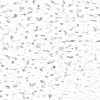

In [5]:
img = load_img('data/test/nocrack/SampleA2_Detail_E_dog_101_206.png', grayscale=True) 
candidate = np.expand_dims(img_to_array(img)/255, axis=0)
pred, prob = test_model.predict_classes(candidate, verbose=0), test_model.predict_proba(candidate, batch_size=1, verbose=0)
class_ = "crack" if pred[0,0] == 0 else "no crack"
conf = 1 - prob[0,0] if pred[0,0] == 0 else prob[0,0]
print('Diagnosis: {} (confidence: {:.2f})'.format(class_,conf))
img

Diagnosis: crack (confidence: 1.00)


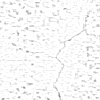

In [6]:
img = load_img('data/test/crack/SampleA2_Detail_E_dog_381_166.png', grayscale=True) 
candidate = np.expand_dims(img_to_array(img)/255, axis=0)
pred, prob = test_model.predict_classes(candidate, verbose=0), test_model.predict_proba(candidate, batch_size=1, verbose=0)
class_ = "crack" if pred[0,0] == 0 else "no crack"
conf = 1 - prob[0,0] if pred[0,0] == 0 else prob[0,0]
print('Diagnosis: {} (confidence: {:.2f})'.format(class_,conf))
img

In [7]:
def score_img(img_path):
    img = load_img(img_path, grayscale=True) 
    candidate = np.expand_dims(img_to_array(img)/255, axis=0)
    pred = test_model.predict_classes(candidate, verbose=0)
    return pred[0,0]

In [8]:
cracks_total = 837
num_cracks_found = 0
for imgfile in os.listdir('data/test/crack'):
    score = score_img('data/test/crack/' + imgfile)
    if score == 0: num_cracks_found = num_cracks_found + 1
print('Found crack in {} of {} images'.format(num_cracks_found, cracks_total))

Found crack in 764 of 837 images


In [9]:
no_cracks_total = 772
num_no_cracks_found = 0
for imgfile in os.listdir('data/test/nocrack'):
    score = score_img('data/test/nocrack/' + imgfile)
    if score == 1: num_no_cracks_found = num_no_cracks_found + 1
print('Correctly said "no crack" in {} of {} images'.format(num_no_cracks_found, no_cracks_total))

Correctly said "no crack" in 696 of 772 images


In [10]:
true_positives = num_cracks_found
false_negatives = cracks_total - true_positives
true_negatives = num_no_cracks_found
false_positives = no_cracks_total - true_negatives

accuracy = (true_positives + true_negatives) / (cracks_total + no_cracks_total)
sensitivity = true_positives / (true_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)

print('Accuracy: {:.3f}, sensitivity: {:.3f}, precision: {:.3f}'.format(accuracy, sensitivity, precision))

Accuracy: 0.907, sensitivity: 0.913, precision: 0.910
